**Mission**

- You need to identify patterns that determine whether a game succeeds or not. 
- This will allow you to spot potential big winners and plan advertising campaigns.

#### Step - Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sb
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st



data = pd.read_csv('/datasets/games.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Missing values in:

- critic_score
- rating
- user_score
- year_of_release
- genre 
- name

#### Step - Prepare the data

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
 - Explain why you filled in the missing values as you did or why you decided to leave them blank.
 - Why do you think the values are missing? Give possible reasons.
 - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [4]:
# Replace the column names (make them lowercase).

data.columns = data.columns.str.lower()

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Dealing with year_of_release

#Filling in missing values with medians where possible
data['year_of_release'] = data['year_of_release'].fillna(data.groupby(['name'])['year_of_release'].transform('first'))

#Dropping all the remaining missing values
data = data.dropna(subset=['year_of_release']) 

data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [7]:
# Dealing with critic_score

data[data['critic_score'].isna()]

data.info()

# Missing values in critic_score are not filled, since doing so would tamper with the reliability of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [8]:
# Dealing with user_score

# Replacing 'tbd' with NaN's

data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'ignore')


# Missing values in user_score are not filled, since doing so would tamper with the reliability of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [9]:
# Dealing with genre and name (dropping both rows since they both have these columns missing and they are only 2)

data = data.dropna(subset=['genre']) 

##### Describe the columns where the data types have been changed and why.

- Dropped remaining missing values in year_of_release
- Changed type of year_of_release to int
- Changed type of user_score to float

In [10]:
data[data['critic_score'].isna()].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.00,0.05,NaN,NaN,NaN
6875,Checkers,2600,1980,Misc,0.22,0.01,0.00,0.00,NaN,NaN,NaN
5360,Freeway,2600,1980,Action,0.32,0.02,0.00,0.00,NaN,NaN,NaN
2650,Boxing,2600,1980,Fighting,0.72,0.04,0.00,0.01,NaN,NaN,NaN
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12714,Kamen Rider: Battride War Genesis,PS4,2016,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
14692,Genkai Tokki: Seven Pirates,PSV,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14689,Samurai Warriors: Sanada Maru,PS4,2016,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14777,Kangokutou Mary Skelter,PSV,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Conclusion**

- There is a pattern between missing values in 'critic_score', 'user_score' and 'rating'.
- Missing values in these columns are seen amongst the **oldest games**, or those with the **lowest sales**.
- A possible explanation for these missing values is that in previous years, these ratings did not exist.
- Another possible explanation is that games that did not succeed in sales, did not get rated.
- I did not fill in the missing values in any of these columns since there was no reliable information that could help fill them up.

In [11]:
# Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column

data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [12]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Step - Analyze the data
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [13]:
# Look at how many games were released in different years. Is the data for every period significant?

games_released = data.groupby(['year_of_release']).agg({'name':['count']}).droplevel(0, axis=1).reset_index()
games_released = games_released.set_index('year_of_release')

<AxesSubplot:xlabel='Year', ylabel='Games released'>

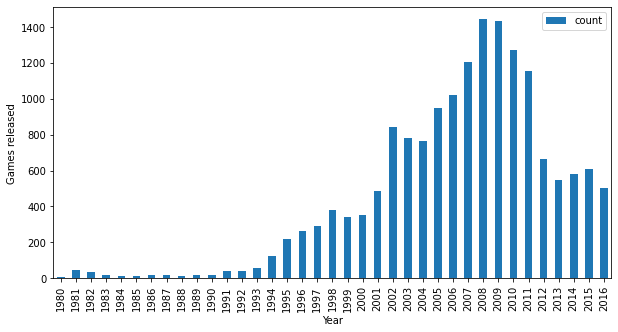

In [14]:
games_released.plot(kind='bar', xlabel= 'Year', ylabel= 'Games released', figsize=(10,5))

**Conclusion**
 
- Between years 1980 - 1993, the number of games released is relatively low and stable
- From 1994, we see the number of games released increase year by year
- The peak years of games released were 2009 and 2009
- Considering our analysis is to plan business activities of 2017, in further steps we will focus only on sales of 2012 and forward

In [15]:
# Look at how sales varied from platform to platform. 
# Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

platform_sales = data.query('platform == ("PS2","X360","PS3","Wii","DS")')
platform_sales = platform_sales.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()

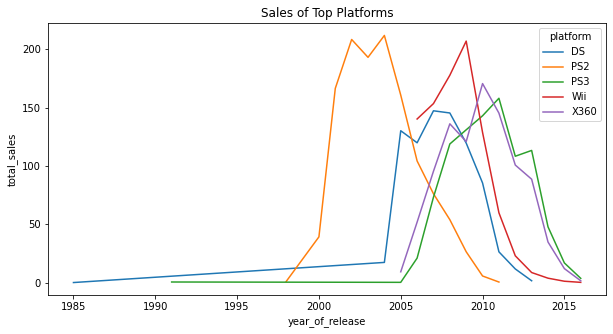

In [16]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=platform_sales, x='year_of_release', y='total_sales', hue='platform').set(title='Sales of Top Platforms')


In [17]:
#Find platforms that used to be popular but now have zero sales. 
#How long does it generally take for new platforms to appear and old ones to fade?

popular_platforms = data.groupby(['platform']).agg({'year_of_release':['min', 'max'], 'total_sales':'sum'}).droplevel(0, axis=1).reset_index()
popular_platforms['life_years'] = popular_platforms['max'] - popular_platforms['min']
popular_platforms.columns = ['platform', 'start_sales', 'end_sales', 'total_sales', 'life_years']
popular_platforms = popular_platforms.sort_values(by= 'total_sales', ascending=False)
popular_platforms[popular_platforms['end_sales'] > 2015]

,platform,start_sales,end_sales,total_sales,life_years
28,X360,2005,2016,966.61,11
17,PS3,1991,2016,935.19,25
26,Wii,2006,2016,903.31,10
18,PS4,2013,2016,314.14,3
13,PC,1985,2016,258.86,31
2,3DS,2000,2016,258.53,16
30,XOne,2013,2016,159.32,3
27,WiiU,2012,2016,82.19,4
20,PSV,2011,2016,53.81,5


In [18]:
#Finding popular games per region

na_favorite_games = data.groupby('name')['na_sales'].sum().sort_values(ascending=False)
eu_favorite_games = data.groupby('name')['eu_sales'].sum().sort_values(ascending=False)
jp_favorite_games = data.groupby('name')['jp_sales'].sum().sort_values(ascending=False)
print(na_favorite_games.head())
print(eu_favorite_games.head())
print(jp_favorite_games.head())

name
Wii Sports            41.36
Super Mario Bros.     32.48
Duck Hunt             26.93
Tetris                26.17
Grand Theft Auto V    23.84
Name: na_sales, dtype: float64
name
Wii Sports                        28.96
Grand Theft Auto V                23.42
Mario Kart Wii                    12.76
FIFA 15                           12.02
Call of Duty: Modern Warfare 3    11.15
Name: eu_sales, dtype: float64
name
Pokemon Red/Pokemon Blue         10.22
Pokemon Gold/Pokemon Silver       7.20
Super Mario Bros.                 6.96
New Super Mario Bros.             6.50
Pokemon Diamond/Pokemon Pearl     6.04
Name: jp_sales, dtype: float64


In [19]:
popular_platforms['life_years'].describe()

count    31.000000
mean      8.741935
std       7.839931
min       0.000000
25%       3.000000
50%       8.000000
75%      11.000000
max      31.000000
Name: life_years, dtype: float64

**Conclusion**

- The average lifecycle of platforms is 8 years 
- The longest lasting platforms have been the PC, followed by DS and PS3
- There are a few platforms that were not popular and did not even last a year: GG, TG16, PCFX	
- A few that used to be popular but now have 0 sales (as of year 2016): PS2, DS, PS
- The most popular platforms as of now (2016) are: X360, PS3, Wii, PS4, PC

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Nice charts and conclusion!
</div>

In [20]:
# Work only with the data that you've decided is relevant. Disregard the data for previous years.
# Which platforms are leading in sales? Which ones are growing or shrinking? 
# Select several potentially profitable platforms.

popular_platforms = popular_platforms[popular_platforms['end_sales'] >= 2015]
popular_platforms.sort_values(by='total_sales', ascending=False)
popular_platforms

,platform,start_sales,end_sales,total_sales,life_years
28,X360,2005,2016,966.61,11
17,PS3,1991,2016,935.19,25
26,Wii,2006,2016,903.31,10
18,PS4,2013,2016,314.14,3
19,PSP,2004,2015,293.57,11
13,PC,1985,2016,258.86,31
2,3DS,2000,2016,258.53,16
30,XOne,2013,2016,159.32,3
27,WiiU,2012,2016,82.19,4
20,PSV,2011,2016,53.81,5


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

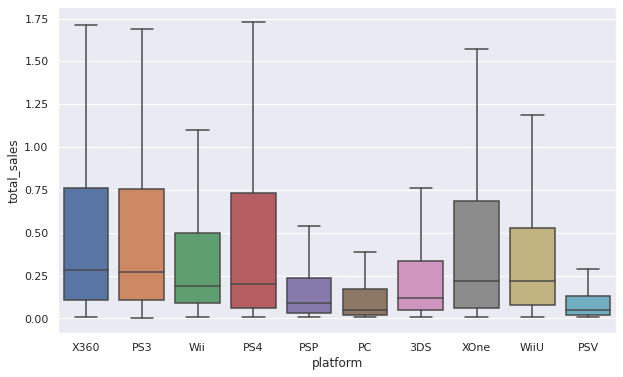

In [21]:
# Build a box plot for the global sales of all games, broken down by platform. 
# Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

boxplot_data = data.query('platform == ("X360","Wii","PS3","PS4","PSP","3DS","PC","XOne","WiiU","PSV")')
boxplot_data = boxplot_data.groupby(['platform', 'name'])['total_sales'].sum().reset_index()

order = boxplot_data.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)['platform']

sb.set(rc={'figure.figsize':(10,6)})
sb.boxplot(x='platform',y='total_sales',data=boxplot_data, order=order, showfliers = False)



In [22]:

x = data[(data['platform'] == 'X360') & (data['critic_score'].notna())][['total_sales', 'critic_score']]
x.corr()

,total_sales,critic_score
total_sales,1.000000,0.391742
critic_score,0.391742,1.000000


In [23]:
#Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
#Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

def effect_of_reviews(platformx, column):
    doto = data[data['year_of_release']>= 2015]
    doto = data[(data['platform'] == platformx) & (data[column].notna())][['total_sales', column]]
    doto.plot(x=(column), y='total_sales', kind='scatter') 
    
    correlation = doto.corr()
    return correlation
    
 


,total_sales,critic_score
total_sales,1.000000,0.391742
critic_score,0.391742,1.000000


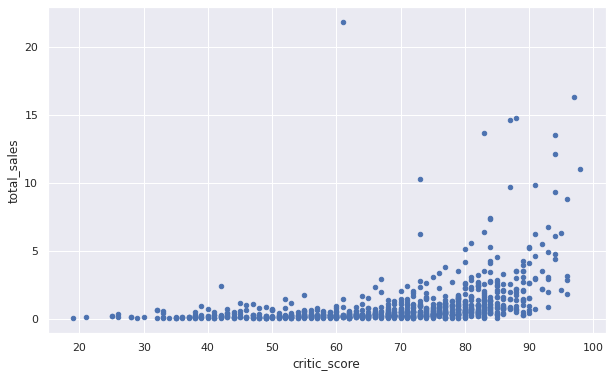

In [24]:
effect_of_reviews('X360', 'critic_score')

,total_sales,user_score
total_sales,1.00000,0.11365
user_score,0.11365,1.00000


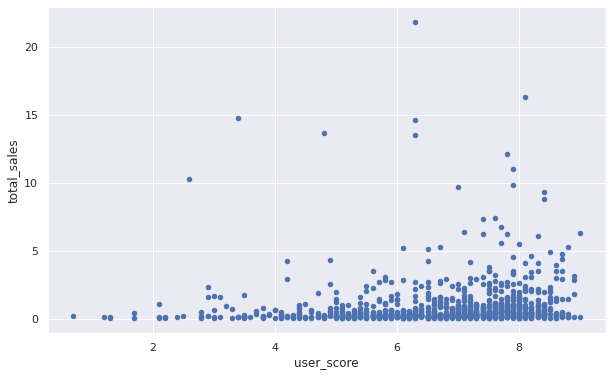

In [25]:
effect_of_reviews('X360', 'user_score')

**Conclusion**
    
- There seems to be a low correlation between user_score and sales
- critic_score also has a low correlation with sales, but higher than than user_score

,total_sales,critic_score
total_sales,1.000000,0.432275
critic_score,0.432275,1.000000


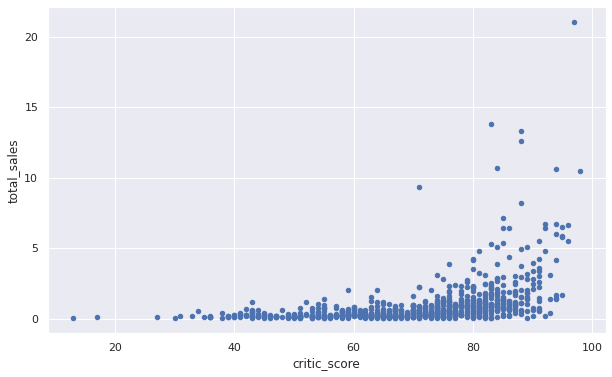

In [26]:
# Keeping your conclusions in mind, compare the sales of the same games on other platforms.

effect_of_reviews('PS3', 'critic_score')

,total_sales,user_score
total_sales,1.000000,0.127811
user_score,0.127811,1.000000


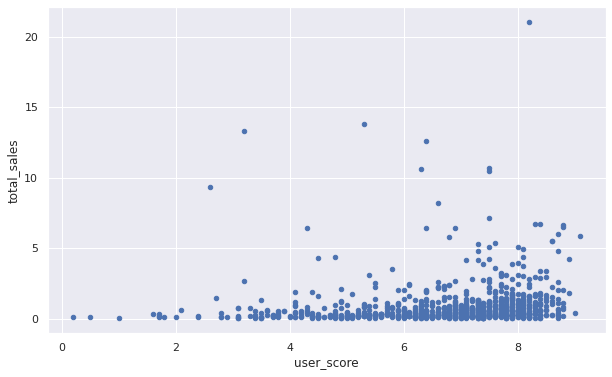

In [27]:
effect_of_reviews('PS3', 'user_score')

**Conclusion**

- user_score seems to have an insignificant effect of sales
- Although not extremely significant, critic_score seems to have a higher correlation with platform sales


<AxesSubplot:title={'center':'Distribution by Genre'}, xlabel='Genre', ylabel='Total Sales'>

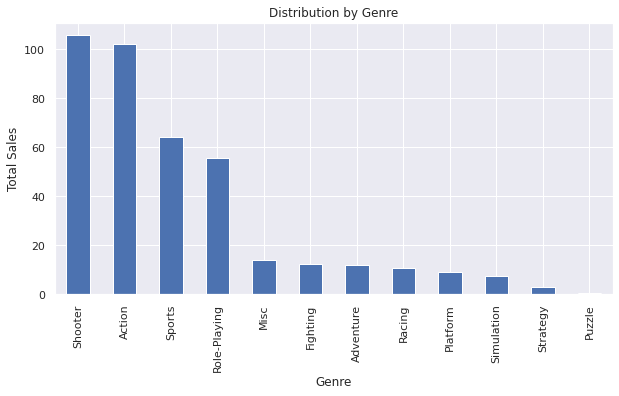

In [28]:
# Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 
# Can you generalize about genres with high and low sales?

genre_distribution = data[data['year_of_release']>=2015]
genre_distribution = genre_distribution.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)
genre_distribution.plot(kind='bar', title= 'Distribution by Genre', xlabel= 'Genre', ylabel= 'Total Sales', figsize=(10,5))

**Conclusion**

- Shooter, action and sports are the most sold genres
- Puzzle, strategy and simulation are the least selling genres

#### Step - Create a user profile for each region

For each region (NA, EU, JP), determine:

In [29]:
# The top five platforms. Describe variations in their market shares from region to region.

NA_platforms = data[['na_sales', 'platform']]
NA_platforms = NA_platforms.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()


NA_platforms['market_share'] = NA_platforms['na_sales']/ NA_platforms['na_sales'].sum()

#Creating a category called "others" to depict all the platforms that are not the top 5
others_na_platforms = {'platform': 'Others', 'na_sales': sum(NA_platforms['na_sales'].loc[5:31]), 'market_share':sum(NA_platforms['market_share'].loc[5:31])}

NA_platforms.drop(NA_platforms.index[5:31], inplace=True)
NA_platforms = NA_platforms.append(others_na_platforms, ignore_index=True)
NA_platforms


,platform,na_sales,market_share
0,X360,599.15,0.137003
1,PS2,580.09,0.132644
2,Wii,494.01,0.112961
3,PS3,391.60,0.089544
4,DS,381.38,0.087207
5,Others,1927.04,0.440641


<AxesSubplot:title={'center':'Market share by platform - NA'}, ylabel='market_share'>

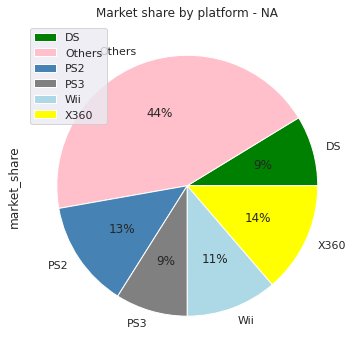

In [30]:
NA_platforms.groupby(['platform']).sum().plot(kind='pie', y='market_share', autopct='%1.0f%%',
                                colors = ['green', 'pink', 'steelblue', 'gray', 'lightblue', 'yellow'],
                                title='Market share by platform - NA', normalize=False)


In [31]:
EU_platforms = data[['eu_sales', 'platform']]
EU_platforms = EU_platforms.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()

EU_platforms['market_share'] = EU_platforms['eu_sales'] / EU_platforms['eu_sales'].sum()

#Creating a category called "others" to depict all the platforms that are not the top 5
others_eu_platforms = {'platform': 'Others', 'eu_sales': sum(EU_platforms['eu_sales'].loc[5:31]), 'market_share':sum(EU_platforms['market_share'].loc[5:31])}


EU_platforms.drop(EU_platforms.index[5:31], inplace=True)
EU_platforms = EU_platforms.append(others_eu_platforms, ignore_index=True)
EU_platforms


,platform,eu_sales,market_share
0,PS2,337.05,0.139525
1,PS3,328.97,0.136180
2,X360,269.79,0.111682
3,Wii,261.48,0.108242
4,PS,212.39,0.087921
5,Others,1006.02,0.416451


<AxesSubplot:title={'center':'Market share by platform - EU'}, ylabel='market_share'>

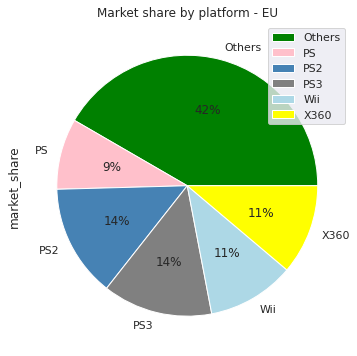

In [32]:
EU_platforms.groupby(['platform']).sum().plot(kind='pie', y='market_share', autopct='%1.0f%%',
                                colors = ['green', 'pink', 'steelblue', 'gray', 'lightblue', 'yellow'],
                                title='Market share by platform - EU', normalize=False)

In [33]:
JP_platforms = data[['jp_sales', 'platform']]
JP_platforms = JP_platforms.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()

JP_platforms['market_share'] = JP_platforms['jp_sales'] / JP_platforms['jp_sales'].sum()

#Creating a category called "others" to depict all the platforms that are not the top 5
others_jp_platforms = {'platform': 'Others', 'jp_sales': sum(JP_platforms['jp_sales'].loc[5:31]), 'market_share':sum(JP_platforms['market_share'].loc[5:31])}

JP_platforms.drop(JP_platforms.index[5:31], inplace=True)
JP_platforms = JP_platforms.append(others_jp_platforms, ignore_index=True)
JP_platforms

,platform,jp_sales,market_share
0,DS,175.02,0.135406
1,PS,139.78,0.108142
2,PS2,137.74,0.106564
3,SNES,116.55,0.090170
4,3DS,100.64,0.077861
5,Others,622.83,0.481858


<AxesSubplot:title={'center':'Market share by platform - JP'}, ylabel='market_share'>

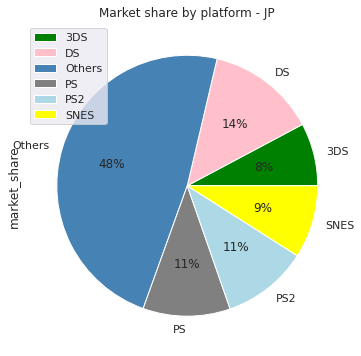

In [34]:
JP_platforms.groupby(['platform']).sum().plot(kind='pie', y='market_share', autopct='%1.0f%%',
                                colors = ['green', 'pink', 'steelblue', 'gray', 'lightblue', 'yellow'],
                                title='Market share by platform - JP', normalize=False)

**Conclusion**

**NA region:** The top 5 platforms in sales, occupying roughly 55% of the market share are:
1. X360
2. PS2
3. Wii
4. PS3
5. DS


**EU region:** The top 5 platforms in sales, occupying roughly 55% of the market share are:
1. PS2
2. PS3
3. X360
4. Wii
5. PS

**JP region:** The top 5 platforms in sales, occupying roughly 50% of the market share are:
1. DS
2. PS
3. PS2
4. SNES
5. 3DS

In [35]:
# The top five genres. Explain the difference.

NA_genres = data[['na_sales', 'genre']]
NA_genres = NA_genres.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
NA_genres['market_share'] = NA_genres['na_sales'] / NA_genres['na_sales'].sum()


#Creating a category called "others" to depict all the genres that are not the top 5
others_na = {'genre': 'Others', 'na_sales': sum(NA_genres['na_sales'].loc[5:11]), 'market_share':sum(NA_genres['market_share'].loc[5:11])}

NA_genres.drop(NA_genres.index[5:12], inplace=True)
NA_genres = NA_genres.append(others_na, ignore_index=True)
NA_genres


,genre,na_sales,market_share
0,Action,873.70,0.199782
1,Sports,681.69,0.155876
2,Shooter,590.35,0.134991
3,Platform,444.44,0.101626
4,Misc,401.69,0.091851
5,Others,1381.40,0.315873


<AxesSubplot:title={'center':'Market share by genre - NA'}, ylabel='market_share'>

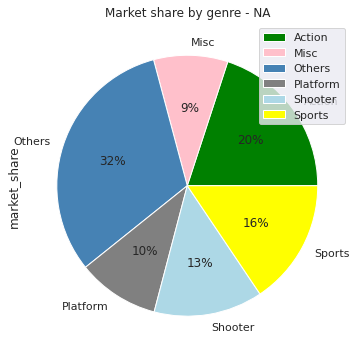

In [36]:
NA_genres.groupby(['genre']).sum().plot(kind='pie', y='market_share', autopct='%1.0f%%',
                                colors = ['green', 'pink', 'steelblue', 'gray', 'lightblue', 'yellow'],
                                title='Market share by genre - NA')

In [37]:
EU_genres = data[['eu_sales', 'genre']]
EU_genres = EU_genres.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
EU_genres['market_share'] = EU_genres['eu_sales'] / EU_genres['eu_sales'].sum()

#Creating a category called "others" to depict all the genres that are not the top 5
others_eu = {'genre': 'Others', 'eu_sales': sum(EU_genres['eu_sales'].loc[5:12]), 'market_share':sum(EU_genres['market_share'].loc[5:12])}
EU_genres.drop(EU_genres.index[5:12], inplace=True)
EU_genres = EU_genres.append(others_eu, ignore_index=True)
EU_genres

,genre,eu_sales,market_share
0,Action,517.58,0.214257
1,Sports,375.60,0.155483
2,Shooter,316.96,0.131208
3,Racing,235.47,0.097475
4,Misc,211.32,0.087478
5,Others,758.77,0.314099


<AxesSubplot:title={'center':'Market share by genre - EU'}, ylabel='market_share'>

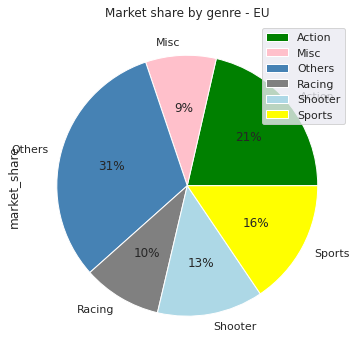

In [38]:
EU_genres.groupby(['genre']).sum().plot(kind='pie', y='market_share', autopct='%1.0f%%',
                                colors = ['green', 'pink', 'steelblue', 'gray', 'lightblue', 'yellow'],
                                title='Market share by genre - EU')

In [39]:
JP_genres = data[['jp_sales', 'genre']]
JP_genres = JP_genres.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
JP_genres['market_share'] = JP_genres['jp_sales'] / JP_genres['jp_sales'].sum()
JP_genres

#Creating a category called "others" to depict all the genres that are not the top 5
others_jp = {'genre': 'Others', 'jp_sales': sum(JP_genres['jp_sales'].loc[5:12]), 'market_share':sum(JP_genres['market_share'].loc[5:12])}
JP_genres.drop(JP_genres.index[5:12], inplace=True)
JP_genres = JP_genres.append(others_jp, ignore_index=True)
JP_genres

,genre,jp_sales,market_share
0,Role-Playing,353.88,0.273782
1,Action,160.15,0.123901
2,Sports,135.27,0.104653
3,Platform,130.71,0.101125
4,Misc,108.04,0.083586
5,Others,404.51,0.312953


<AxesSubplot:title={'center':'Market share by genre - JP'}, ylabel='market_share'>

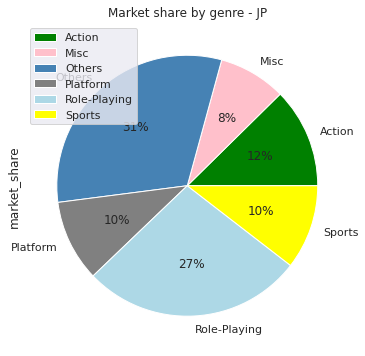

In [40]:
JP_genres.groupby(['genre']).sum().plot(kind='pie', y='market_share', autopct='%1.0f%%',
                                colors = ['green', 'pink', 'steelblue', 'gray', 'lightblue', 'yellow'],
                                title='Market share by genre - JP', normalize=False)

**Conclusion**

- The NA and EU markets are similar in their preferences: Action, Sports and Shooter take up about 50% of the market share in both regions
- Japan's favorite genre is  Role-Playing with 27% of market share.



In [41]:
# Do ESRB ratings affect sales in individual regions?

# excluding all empty values in 'rating' column
esrb = data[data['rating']!='']


# Replacing 'esrb' categorical values with numerical for correlation analysis:

# 'E' - 1 (everyone)
# EC - 2 (early childhood)
# 'K-A' - 3 (kids to adults)
# 'E10+' - 4 (everyone 10 up)
# 'T' - 5 (teen)
# 'M' - 6 (mature)
# AO - 7 (adults only)
# RP - 8 (rating pending)

pd.options.mode.chained_assignment = None 
esrb['rating'].replace(['E', 'EC', 'K-A', 'E10+', 'T', 'M', 'AO', 'RP'],[1,2,3,4,5,6,7,8], inplace=True)


In [42]:
print(esrb['na_sales'].corr(esrb['rating']))
print(esrb['eu_sales'].corr(esrb['rating']))
print(esrb['jp_sales'].corr(esrb['rating']))

0.01450207721497183
0.028151843054372364
-0.009921203207733036


**Conclusion**

ESRB ratings have a very low correlation with individual sales in each region.
It seems these ratings have no effect on sales.

#### Step - Test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

In [43]:
# H0 - Average user ratings of the Xbox One and PC platforms are the same.
# H1 - Average user ratings of the Xbox One and PC platforms are not the same.

xone = data[(data['platform'] == 'XOne') & (data['user_score'].notna())][['user_score']]
pc = data[(data['platform'] == 'PC') & (data['user_score'].notna())][['user_score']]

# Checking whether the populations' variance is the same or not
print('Difference in variance between populations:',(np.var(xone['user_score']) - np.var(pc['user_score']))/np.var(xone['user_score']))
print()
# Since the difference between populations' variance is larger than abs(5%), will consider them different

# Creating equally sized samples
sample_xone = xone['user_score'].sample(n=100, random_state=42)
sample_pc = pc['user_score'].sample(n=100, random_state=42)

alpha = 0.05

results = st.ttest_ind(sample_xone, sample_pc, equal_var = False)

print(f'p-value: {results.pvalue} \n')
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


Difference in variance between populations: -0.22953326195111529

p-value: 1.215560381819851e-05 

We reject the null hypothesis


**Conclusion**

Average user ratings of the Xbox One and PC platforms are not the same.

In [44]:
# Average user ratings for the Action and Sports genres are different.

# H0 - Average user ratings for the Action and Sports genres are the same.
# H1 - Average user ratings for the Action and Sports genres are different.

action = data[(data['genre'] == 'Action') & (data['user_score'].notna())][['user_score']]
sports = data[(data['genre'] == 'Sports') & (data['user_score'].notna())][['user_score']]


# Checking whether the populations' variance is the same or not

print('Difference in variance between populations:', (np.var(action['user_score']) - np.var(sports['user_score']))/np.var(action['user_score']))
# Since the difference between populations' variance is larger than abs(5%), will consider them different

# Creating equally sized samples
sample_action = action['user_score'].sample(n=100, random_state=42)
sample_sports = sports['user_score'].sample(n=100, random_state=42)

alpha = 0.05

results = st.ttest_ind(sample_action, sample_sports, equal_var = False)

print(f'p-value: {results.pvalue} \n')
print()
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")



Difference in variance between populations: -0.284259547947095
p-value: 0.3807479633922145 


We can't reject the null hypothesis


**Conclusion**

- It seems that in fact, the average user ratings for the Action and Sports genres may be the same.
- The p-value tells us that there is a 68% probability of randomly getting equal user ratings for action and sports games.

#### General Conclusions


- When deciding which games to focus on, no need to pay attention to user_score so much.
- Critic scores can guide decisions to some extent, not 100%, but more than user ratings 
- ESRB ratings have a very low correlation with individual sales in each region.

- Shooter, action and sports are the most sold genres
- Puzzle, strategy and simulation are the least selling genres

- Purchase games belonging to the most popular platforms as of now (2016): X360, PS3, Wii, PS4, PC

**Most Sold Games per Region**:

- NA: Wii Sports, Super Mario Bros., Duck Hunt, Tetris, Grand Theft Auto.
- EU: Wii Sports, Grand Theft Auto, Mario Kart Wii, FIFA, Call of Duty: Modern Warfare
- JP: Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon Silver, Super Mario Bros., New Super Mario Bros., Pokemon Diamond/Pokemon Pearl